In [18]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [19]:
# 1 -> pneumonia
# 0 -> normal
def read_data(set):
    path = "/content/drive/MyDrive/Colab Notebooks/covid_xray_classification/images/{}/".format(set)
    p_images = os.listdir(path + 'PNEUMONIA')
    n_images = os.listdir(path + 'NORMAL')

    p_X = [np.sum(cv2.resize(cv2.imread(path + "PNEUMONIA/{}".format(image)), (100,100)), axis=2) for image in p_images]
    n_X = [np.sum(cv2.resize(cv2.imread(path + "NORMAL/{}".format(image)), (100,100)), axis=2) for image in n_images]
    X = np.array(p_X + n_X)

    p_y = np.full(len(p_X), 1)
    n_y = np.full(len(n_X), 0)
    y = np.append(p_y, n_y)

    inds = np.arange(X.shape[0])
    np.random.shuffle(inds)

    X = X[inds]
    y = y[inds]
    return X, y

In [20]:
x_train, y_train = read_data('train')
x_val, y_val = read_data('test')

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(420, activation="relu"),
    tf.keras.layers.Dense(210, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(32, activation="tanh"),
    tf.keras.layers.Dense(2)                                                 
])

In [25]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=.003),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 5ms/step - loss: 1.6328 - accuracy: 0.7414
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 1.3957 - accuracy: 0.7259
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 1.0884 - accuracy: 0.7363
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1919 - accuracy: 0.9200
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.2707 - accuracy: 0.8838
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1209 - accuracy: 0.9457
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1657 - accuracy: 0.9539
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1585 - accuracy: 0.9324
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1133 - accuracy: 0.9687
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0745 - accuracy: 0.9814
Epoch 11/100
5/5 [===========

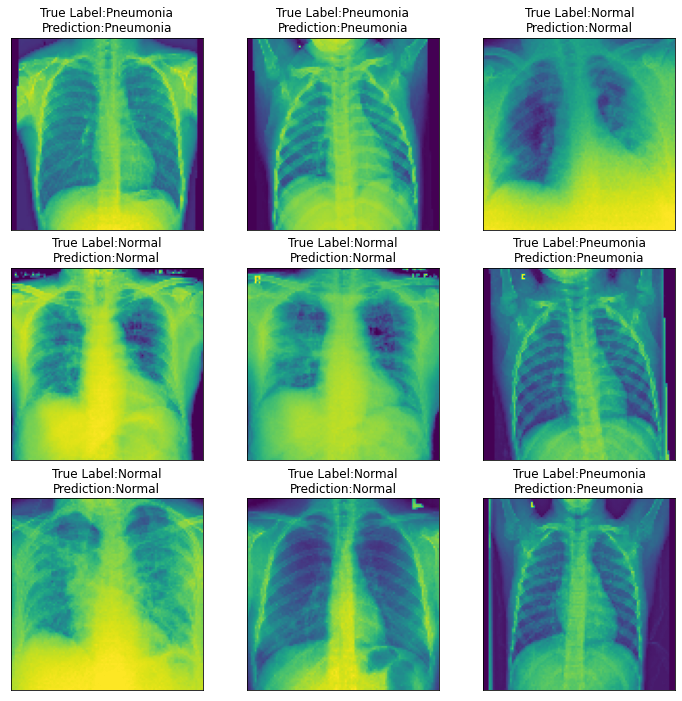

In [26]:
class_labels = ["Pneumonia", "Normal"]
plt.figure(figsize=(12, 12))
for i in range(9):
    pred = model.predict(x_test[i].reshape(-1, 100, 100)).tolist()[0]
    pred = pred.index(max(pred))
    pred = class_labels[pred]
    true = class_labels[y_test[i]]
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.title("True Label:{}\nPrediction:{}".format(true, pred))

In [27]:
loss, acc = model.evaluate(x_test, y_test) 
print("Validation Loss: {}".format(loss))
print("Validation Accuracy: {}".format(acc))

2/2 [==============================] - 0s 6ms/step - loss: 0.1350 - accuracy: 0.9750
Validation Loss: 0.13504450023174286
Validation Accuracy: 0.9750000238418579
